### 学习Andrew的ML入门课程的coding笔记 

下面简单模拟GD算法在单变量线性回归模型中的使用

Train time : 0  w : 1.3855555555555554  b : 0.09444444444444444 cost : 42.06364259259257
Train time : 500  w : 0.5738162538213107  b : 2.8539946659114306 cost : 1.1895967435903545
Train time : 1000  w : 0.5427093478045026  b : 3.374406163201198 cost : 1.1230991162831891
Train time : 1500  w : 0.5369237990352771  b : 3.4711970846772484 cost : 1.1207988313592196
Train time : 2000  w : 0.5358477494100591  b : 3.489199151366726 cost : 1.1207192599377158
Train time : 2500  w : 0.5356476157940235  b : 3.492547341467108 cost : 1.1207165074042997
Train time : 3000  w : 0.5356103931015671  b : 3.4931700686873537 cost : 1.1207164121887052
Train time : 3500  w : 0.5356034700825304  b : 3.4932858892289658 cost : 1.1207164088950088
Train time : 4000  w : 0.5356021824757126  b : 3.4933074305996055 cost : 1.1207164087810733
Train time : 4500  w : 0.5356019429947421  b : 3.4933114370620397 cost : 1.1207164087771324
Train time : 5000  w : 0.5356018984538663  b : 3.4933121822208113 cost : 1.120716408776

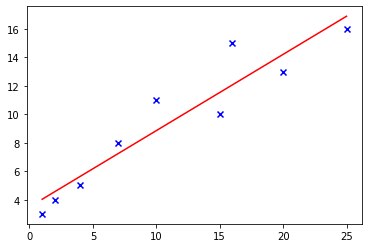

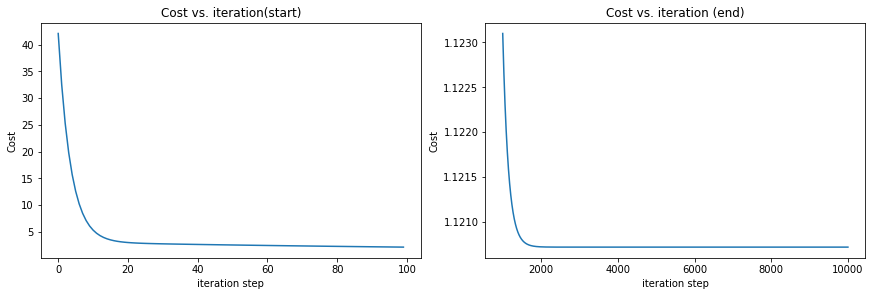

In [32]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,4,7,10,15,16,20,25])
y = np.array([3,4,5,8,11,10,15,13,16])
plt.scatter(x,y,marker='x',c='b')
# plt.show()

def cost_func(w,b,x,y):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        cost += (w*x[i]+b-y[i])**2
    cost /= (2*n)
    return cost

def derivative_w(w,b,x,y):
    n = x.shape[0]
    val_w = 0
    for i in range(n):
        val_w += x[i]*(w*x[i]+b-y[i])
    val_w /= n
    # print(val_w)
    return val_w

def derivative_b(w,b,x,y):
    n = x.shape[0]
    val_b = 0
    for i in range(n):
        val_b += (w*x[i]+b-y[i])
    val_b /= n
    return val_b

def change_parameter(x,y,cost_hist,w=0,b=0,lr=0.1,train_times=1000):
    cost = cost_func(w,b,x,y)
    for i in range(train_times):
        der_w,der_b = derivative_w(w,b,x,y),derivative_b(w,b,x,y)
        w = w - lr * der_w
        b = b - lr * der_b
        cost = cost_func(w,b,x,y)
        cost_hist.append(cost)
        # print(w,b)
        # print(cost)
        if i % 500 == 0 :
            print("Train time : "+ str(i) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

cost_hist = []
w,b = change_parameter(x,y,cost_hist,w=0,b=0,lr=0.01,train_times=10000)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 25, 50)
yy = w*xx + b
plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


使用了简单的GD算法进行模型的训练，其中循环的终止条件有多种，这里借鉴了lab里面用循环次数作为终止条件比较好看，也绘制了cost曲线来追踪模型的训练过程。

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取 CSV 文件
data = pd.read_csv("data.csv")

# 将数据帧划分为训练集和数据集
train_data, test_data = train_test_split(data, test_size=0.2)
